# Statement
size of dataset: 192 images scraped from Google with keyword "bench in istanbul"

how I gathered data: I used data scraping skills to scrape these data from Google

datatype of the dataset: image format such as JPEG, PNG, WEBP

# Graphs and trees to navigate between higher dimensional data

In [1]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

In [4]:
import networkx as nx
from sklearn.neighbors import NearestNeighbors

In [5]:
from IPython.display import Image as iImage
from IPython.display import display

In [6]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [7]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 0s 0us/step


In [8]:
def processImage(imagePath, model):
    im = load_image(imagePath)
    f = model.predict(im)[0]
    return f

In [14]:
benchFiles = os.listdir('/content/drive/MyDrive/ColabNotebooks/04_DesignAlgorithms/bench_in_istanbul')

In [15]:
benchFiles

['benchinistanbul0.jpeg',
 'benchinistanbul1.jpeg',
 'benchinistanbul2.jpeg',
 'benchinistanbul3.jpeg',
 'benchinistanbul6.jpeg',
 'benchinistanbul4.jpeg',
 'benchinistanbul7.jpeg',
 'benchinistanbul5.jpeg',
 'benchinistanbul9.jpeg',
 'benchinistanbul8.jpeg',
 'benchinistanbul10.jpeg',
 'benchinistanbul11.jpeg',
 'benchinistanbul12.jpeg',
 'benchinistanbul14.jpeg',
 'benchinistanbul17.jpeg',
 'benchinistanbul15.jpeg',
 'benchinistanbul16.jpeg',
 'benchinistanbul13.jpeg',
 'benchinistanbul18.jpeg',
 'benchinistanbul20.jpeg',
 'benchinistanbul19.jpeg',
 'benchinistanbul21.jpeg',
 'benchinistanbul22.jpeg',
 'benchinistanbul23.jpeg',
 'benchinistanbul25.jpeg',
 'benchinistanbul26.jpeg',
 'benchinistanbul24.jpeg',
 'benchinistanbul29.jpeg',
 'benchinistanbul28.jpeg',
 'benchinistanbul30.jpeg',
 'benchinistanbul31.jpeg',
 'benchinistanbul27.jpeg',
 'benchinistanbul33.jpeg',
 'benchinistanbul32.jpeg',
 'benchinistanbul34.jpeg',
 'benchinistanbul35.jpeg',
 'benchinistanbul38.jpeg',
 'benchinis

In [16]:
features = []
for m in benchFiles:
    path = os.path.join('/content/drive/MyDrive/ColabNotebooks/04_DesignAlgorithms/bench_in_istanbul', m)
    f = processImage(path, model)
    features.append(f)

1/1 [==============================] - 0s 64ms/step


In [17]:
nbrs = NearestNeighbors(n_neighbors = 8, algorithm='auto').fit(features)
distances, indices = nbrs.kneighbors(features)

In [18]:
indices

array([[  0,   3,  18, ..., 152, 184, 116],
       [  1,  48,  26, ...,   7, 184,  10],
       [  2,  61,  37, ...,  52,   6,  85],
       ...,
       [189, 142,  39, ...,  31,  97, 133],
       [190,  10,  24, ...,  25, 109,  72],
       [191,  16,  62, ...,  31,  34,  18]])

In [19]:
def showNearestNeighbours(index, indices, files, path):
    for i in indices[index]:
        f = files[i]
        print(f)
        display(iImage(filename = os.path.join(path, f)))

benchinistanbul9.jpeg


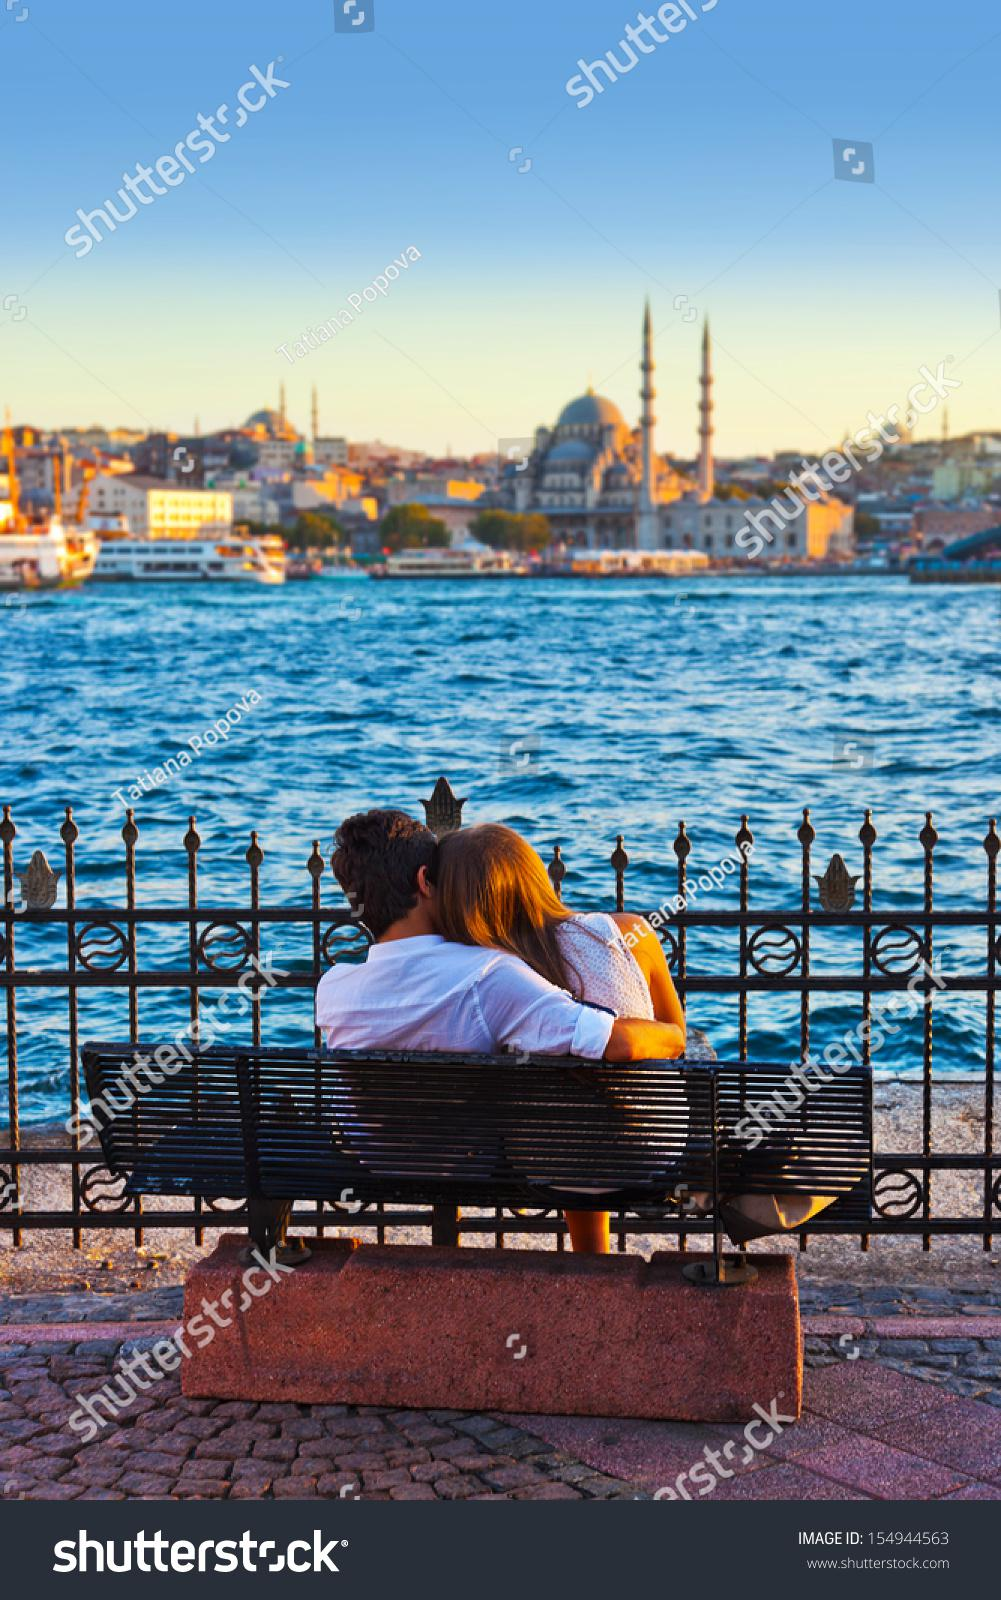

benchinistanbul188.jpeg


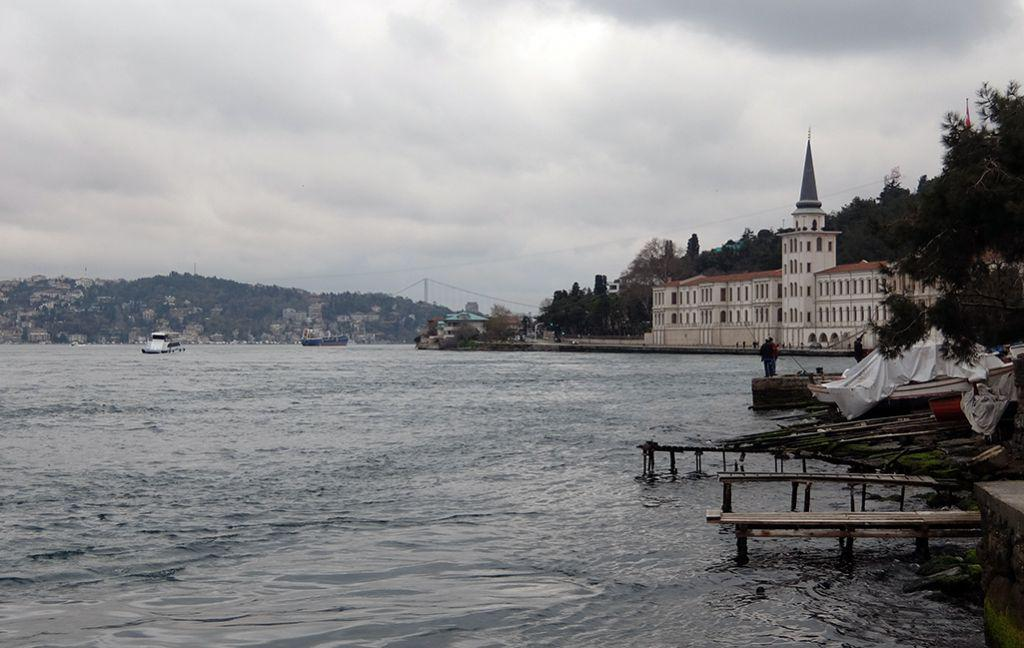

benchinistanbul15.jpeg


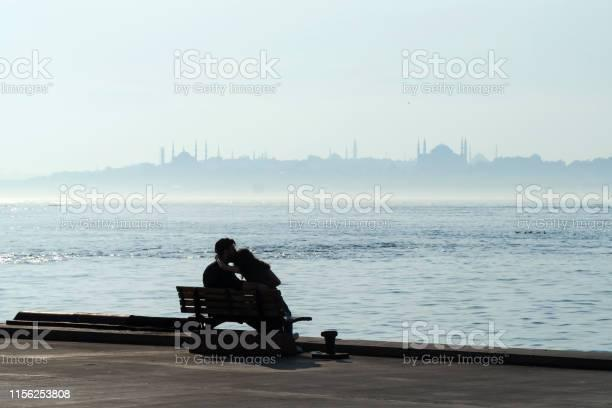

benchinistanbul184.jpeg


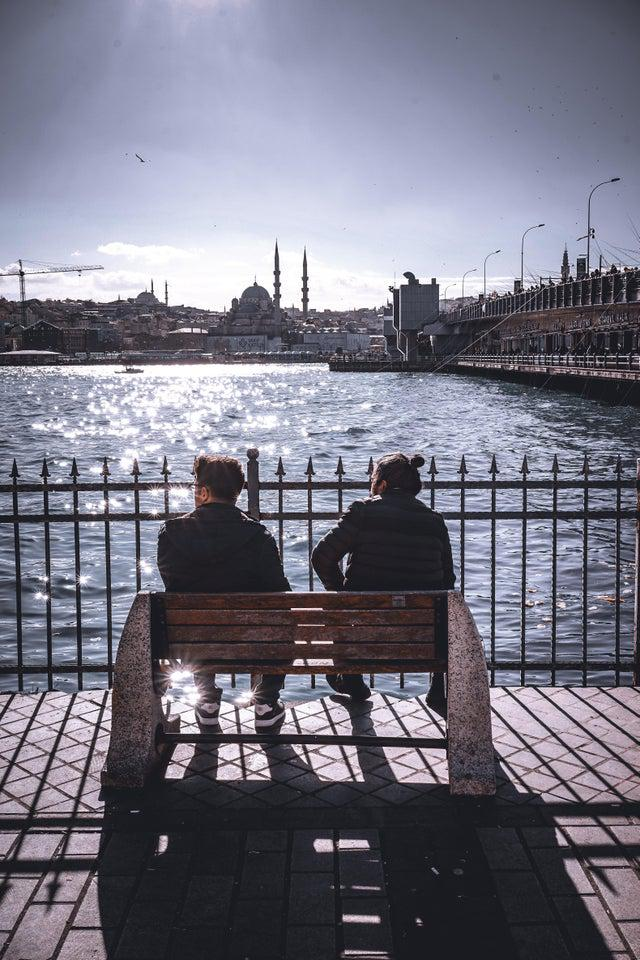

benchinistanbul17.jpeg


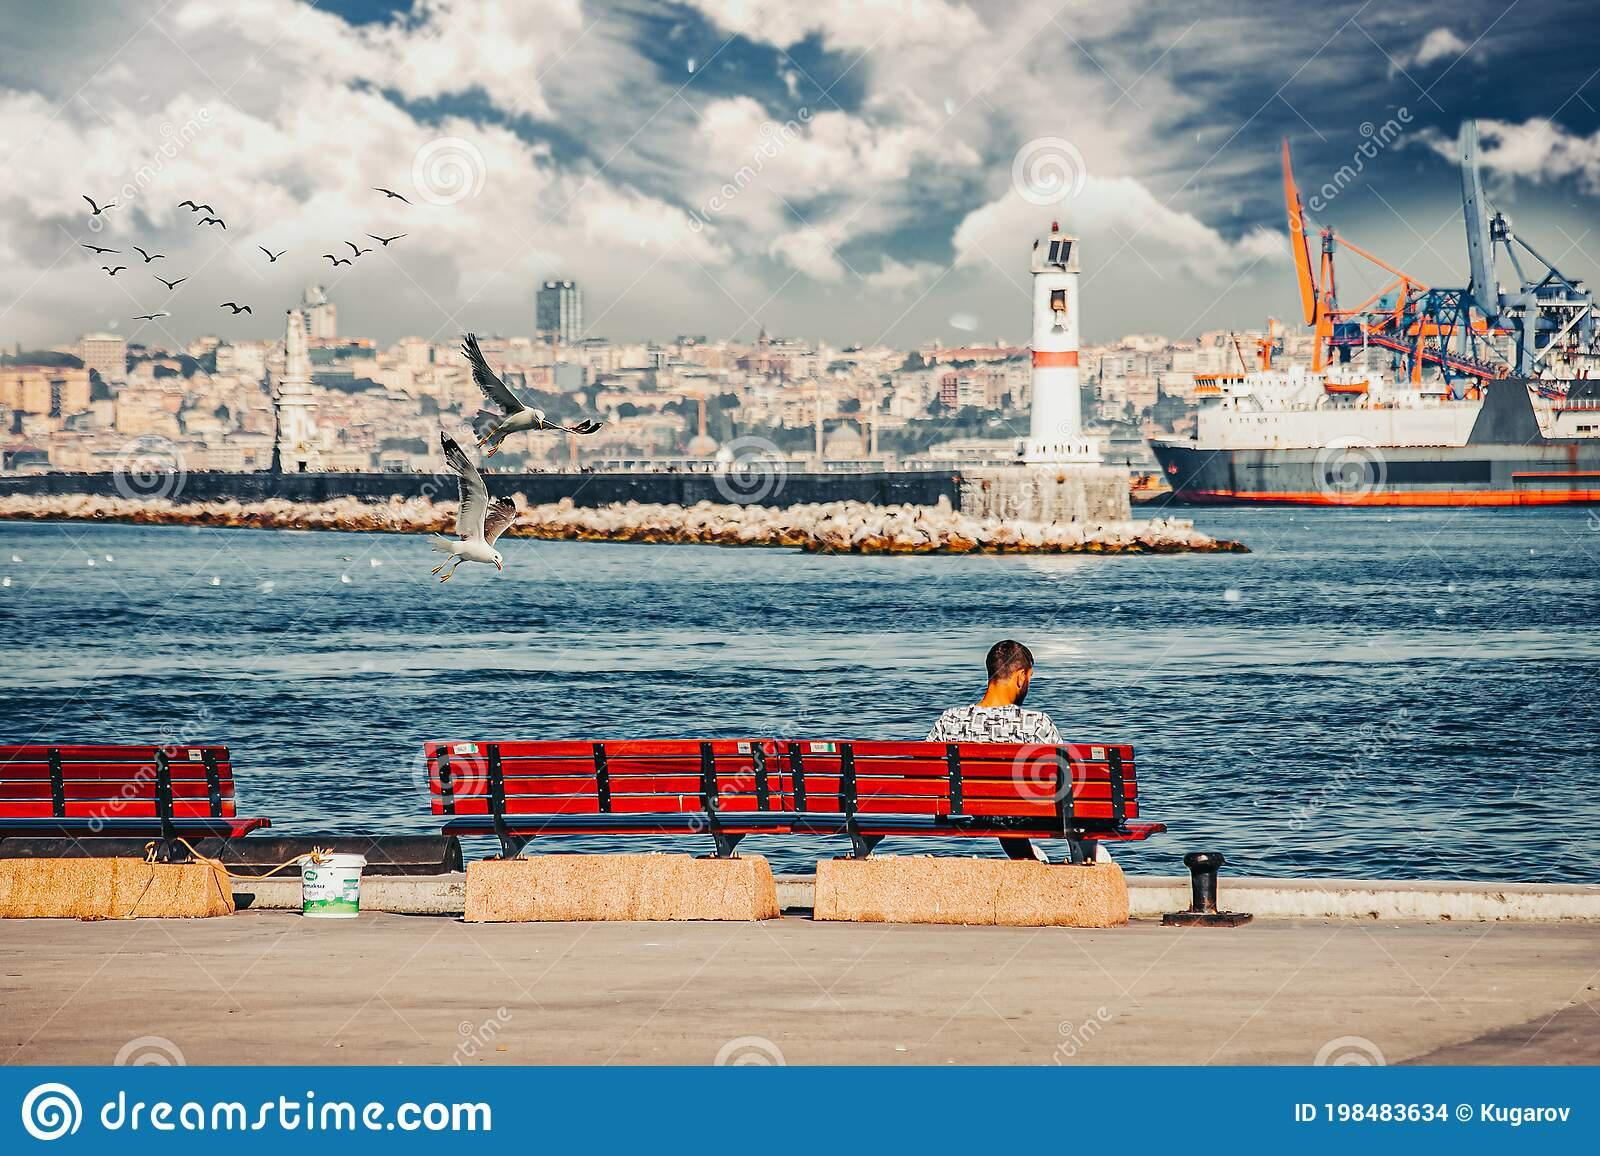

benchinistanbul72.jpeg


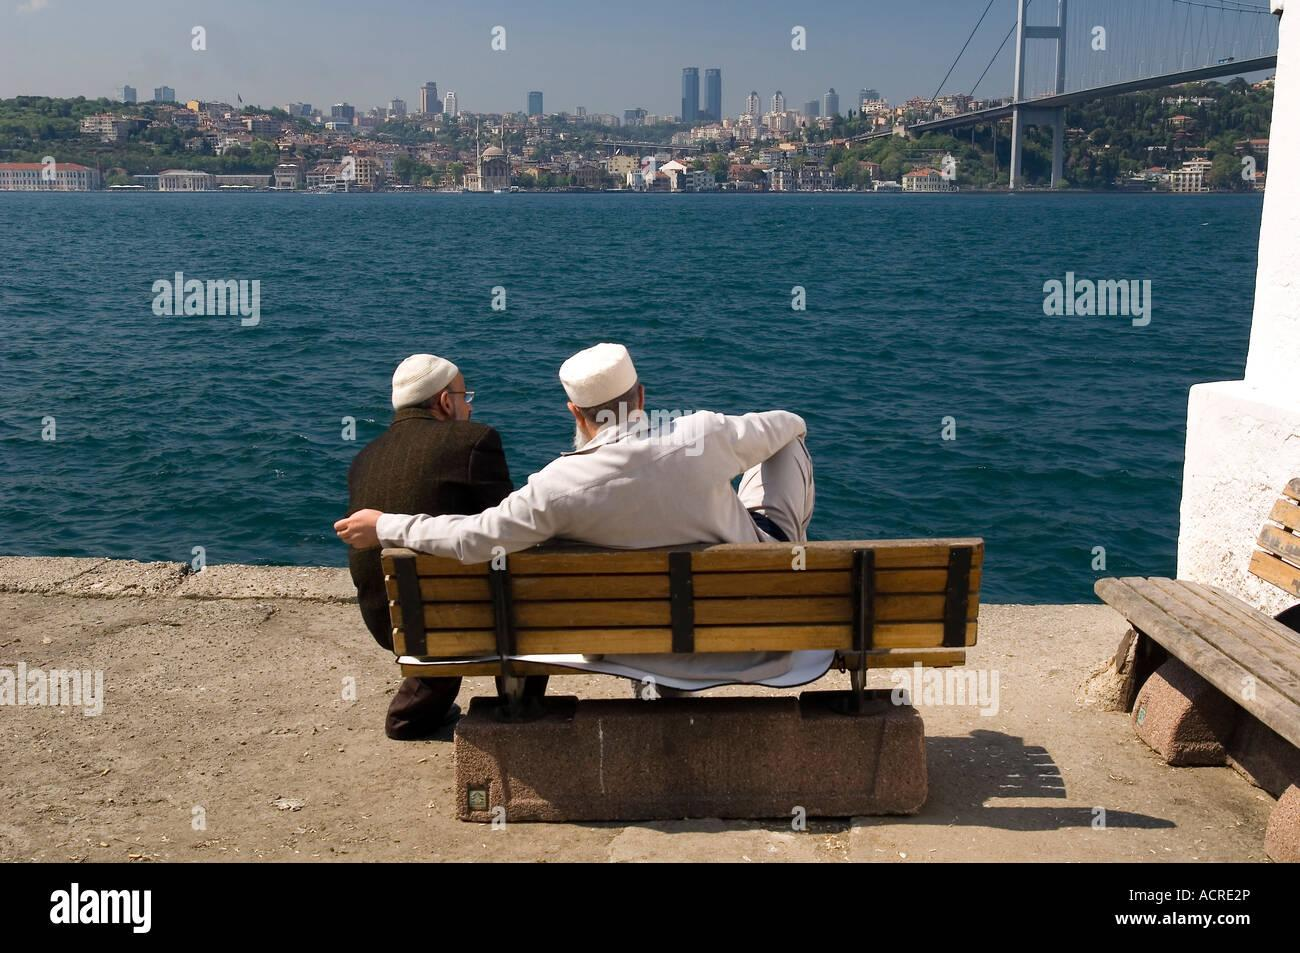

benchinistanbul5.jpeg


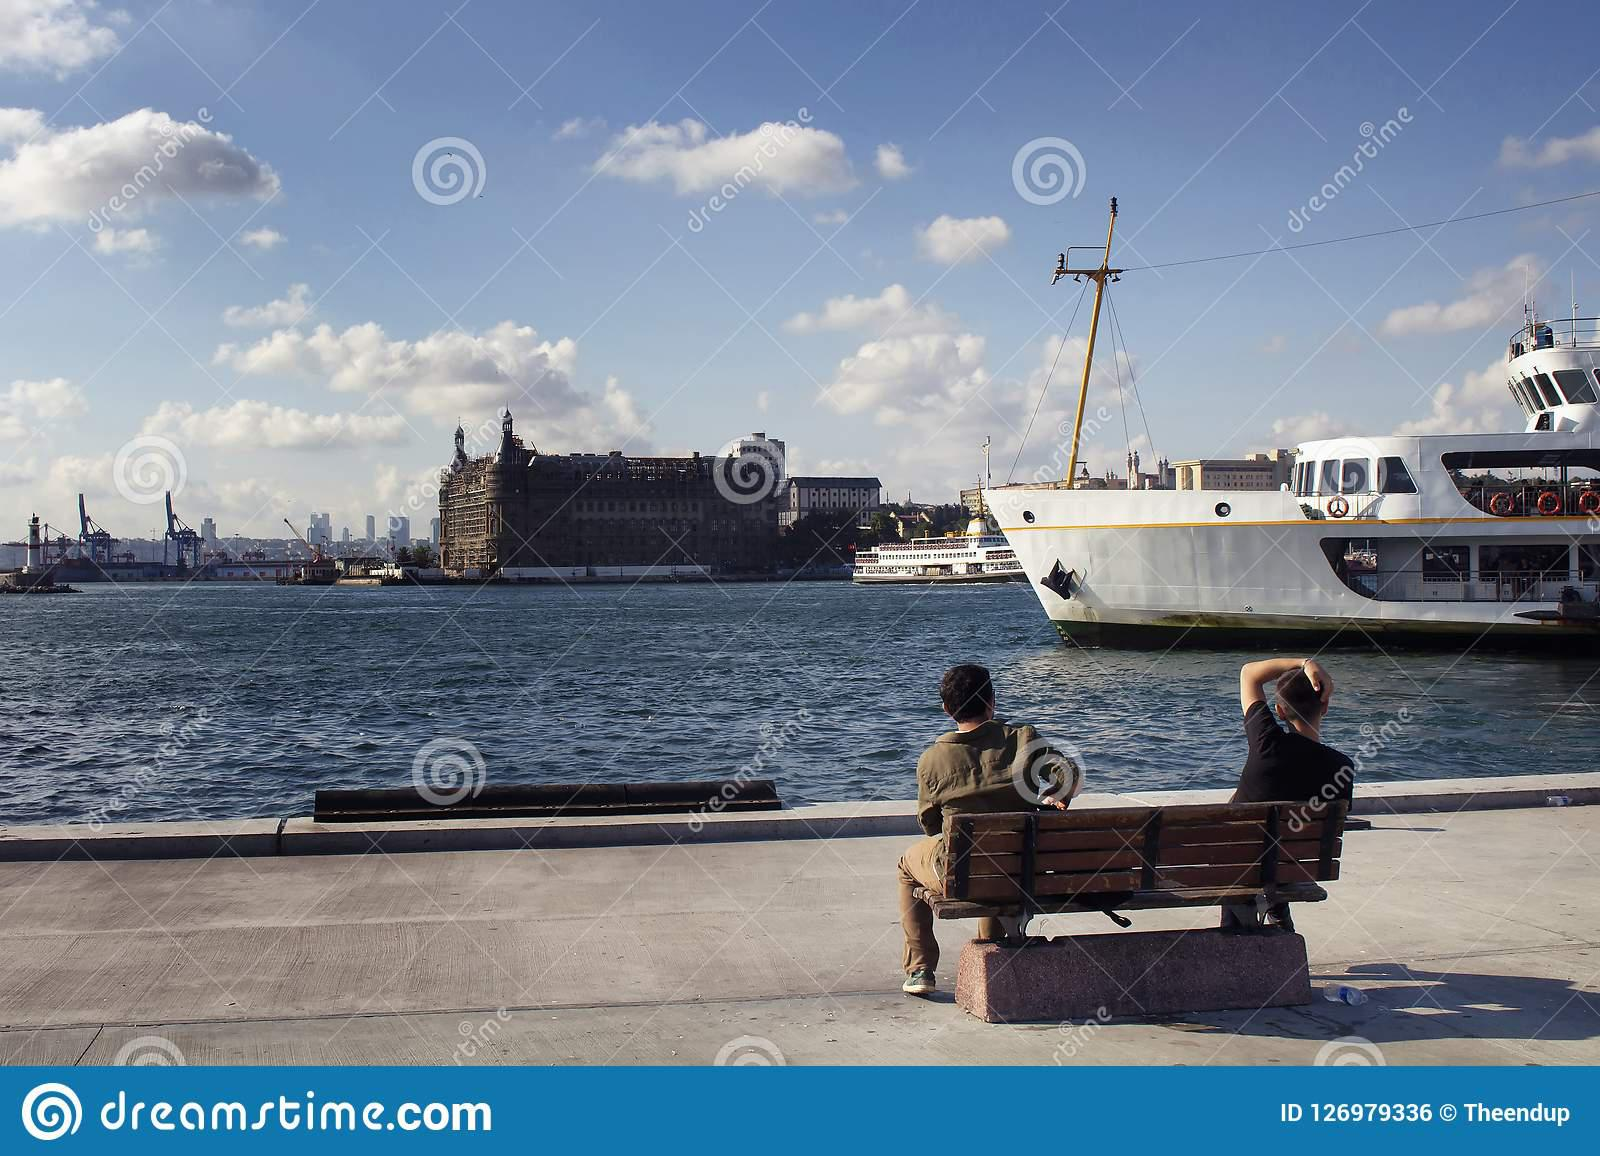

benchinistanbul107.jpeg


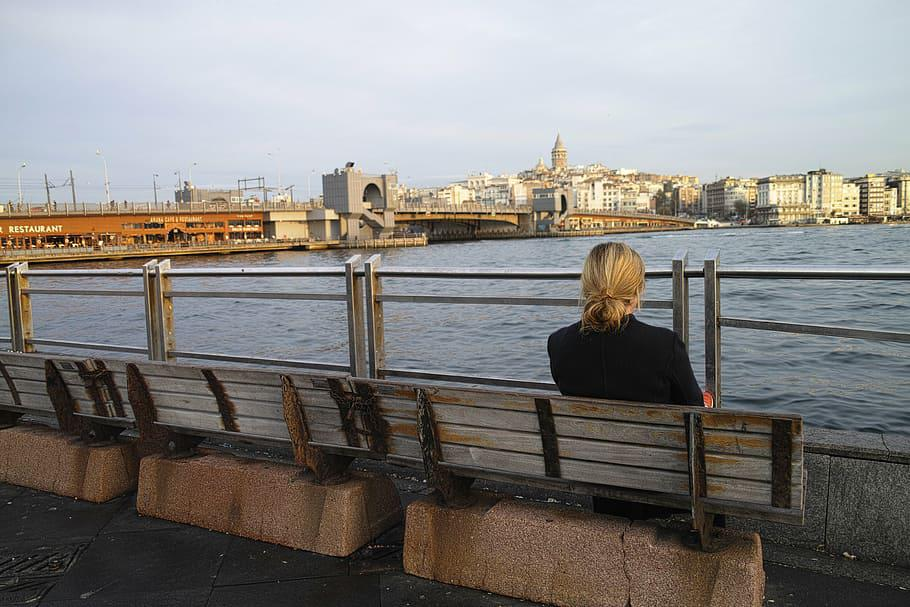

In [22]:
showNearestNeighbours(8, indices, benchFiles, '/content/drive/MyDrive/ColabNotebooks/04_DesignAlgorithms/bench_in_istanbul')

In [23]:
distances

array([[1.16800773e-06, 2.27894254e+01, 2.33144622e+01, ...,
        2.40827241e+01, 2.42183216e+01, 2.42265927e+01],
       [8.25906185e-07, 2.51544946e+01, 2.52372011e+01, ...,
        2.57471235e+01, 2.58765603e+01, 2.59526417e+01],
       [9.53674316e-07, 2.32887886e+01, 2.36812636e+01, ...,
        2.71971090e+01, 2.77864476e+01, 2.79687860e+01],
       ...,
       [8.25906185e-07, 1.80769180e+01, 2.35716719e+01, ...,
        2.42921958e+01, 2.43158976e+01, 2.44079242e+01],
       [1.16800773e-06, 2.67325497e+01, 2.70712606e+01, ...,
        2.75977710e+01, 2.76515169e+01, 2.76722963e+01],
       [8.25906185e-07, 1.97089665e+01, 2.29652726e+01, ...,
        2.68836366e+01, 2.72781344e+01, 2.73172785e+01]])

In [24]:
G = nx.Graph()

In [25]:
for be in benchFiles:
    G.add_node(be)

In [26]:
def createEdges(indices, files, distances):
    weightedEdges = []
    for i in range(len(indices)):
        index = indices[i]
        dist = distances[i][1:]
        
        node = files[index[0]]
        
        edges = []
        print(dist)
        for e in index[1:]:
            edges.append(files[e])
        
        for i in range(len(edges)):
            weightedEdges.append((node, edges[i], dist[i]))
    
    return weightedEdges

In [27]:
edges = createEdges (indices, benchFiles, distances)

[22.7894254  23.31446221 23.33800627 23.60257234 24.0827241  24.21832157
 24.22659273]
[25.15449455 25.23720113 25.23720113 25.26780632 25.74712348 25.87656033
 25.95264171]
[23.28878863 23.68126361 24.22910817 26.43973584 27.19710902 27.78644759
 27.96878601]
[21.8325418  22.51287067 22.76438231 22.7894254  23.59049931 23.86863488
 24.21379234]
[24.90018036 25.18114791 25.94630757 26.15627567 26.16384205 26.76378925
 26.82041377]
[23.34533572 24.97620327 26.19747349 27.18621136 27.90973829 27.9138832
 27.96572413]
[23.61042974 24.74153131 25.18114791 25.55152027 25.58421869 25.80963636
 26.13285104]
[24.19438669 24.5470677  24.62136489 24.682158   25.27023139 25.35115923
 25.6286416 ]
[24.38947887 24.58892007 24.62611906 25.0233314  25.06402325 25.77620097
 26.07473577]
[24.97620327 26.58884264 27.6060179  28.65137529 28.92364553 29.13069955
 29.27812317]
[23.91427434 23.91450021 24.20845547 24.21379234 24.4726522  24.69872421
 24.84491816]
[22.12114859 22.56416632 24.19900279 24.5769

In [28]:
edges

[('benchinistanbul0.jpeg', 'benchinistanbul3.jpeg', 22.78942540206422),
 ('benchinistanbul0.jpeg', 'benchinistanbul18.jpeg', 23.314462205875966),
 ('benchinistanbul0.jpeg', 'benchinistanbul30.jpeg', 23.338006269197326),
 ('benchinistanbul0.jpeg', 'benchinistanbul174.jpeg', 23.602572336472935),
 ('benchinistanbul0.jpeg', 'benchinistanbul158.jpeg', 24.082724100434657),
 ('benchinistanbul0.jpeg', 'benchinistanbul188.jpeg', 24.218321568791158),
 ('benchinistanbul0.jpeg', 'benchinistanbul118.jpeg', 24.226592732164303),
 ('benchinistanbul1.jpeg', 'benchinistanbul49.jpeg', 25.154494552493123),
 ('benchinistanbul1.jpeg', 'benchinistanbul24.jpeg', 25.237201128508314),
 ('benchinistanbul1.jpeg', 'benchinistanbul23.jpeg', 25.237201128508314),
 ('benchinistanbul1.jpeg', 'benchinistanbul115.jpeg', 25.267806318175158),
 ('benchinistanbul1.jpeg', 'benchinistanbul5.jpeg', 25.747123483522994),
 ('benchinistanbul1.jpeg', 'benchinistanbul188.jpeg', 25.87656032999206),
 ('benchinistanbul1.jpeg', 'benchini

In [29]:
G.add_weighted_edges_from(edges)

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


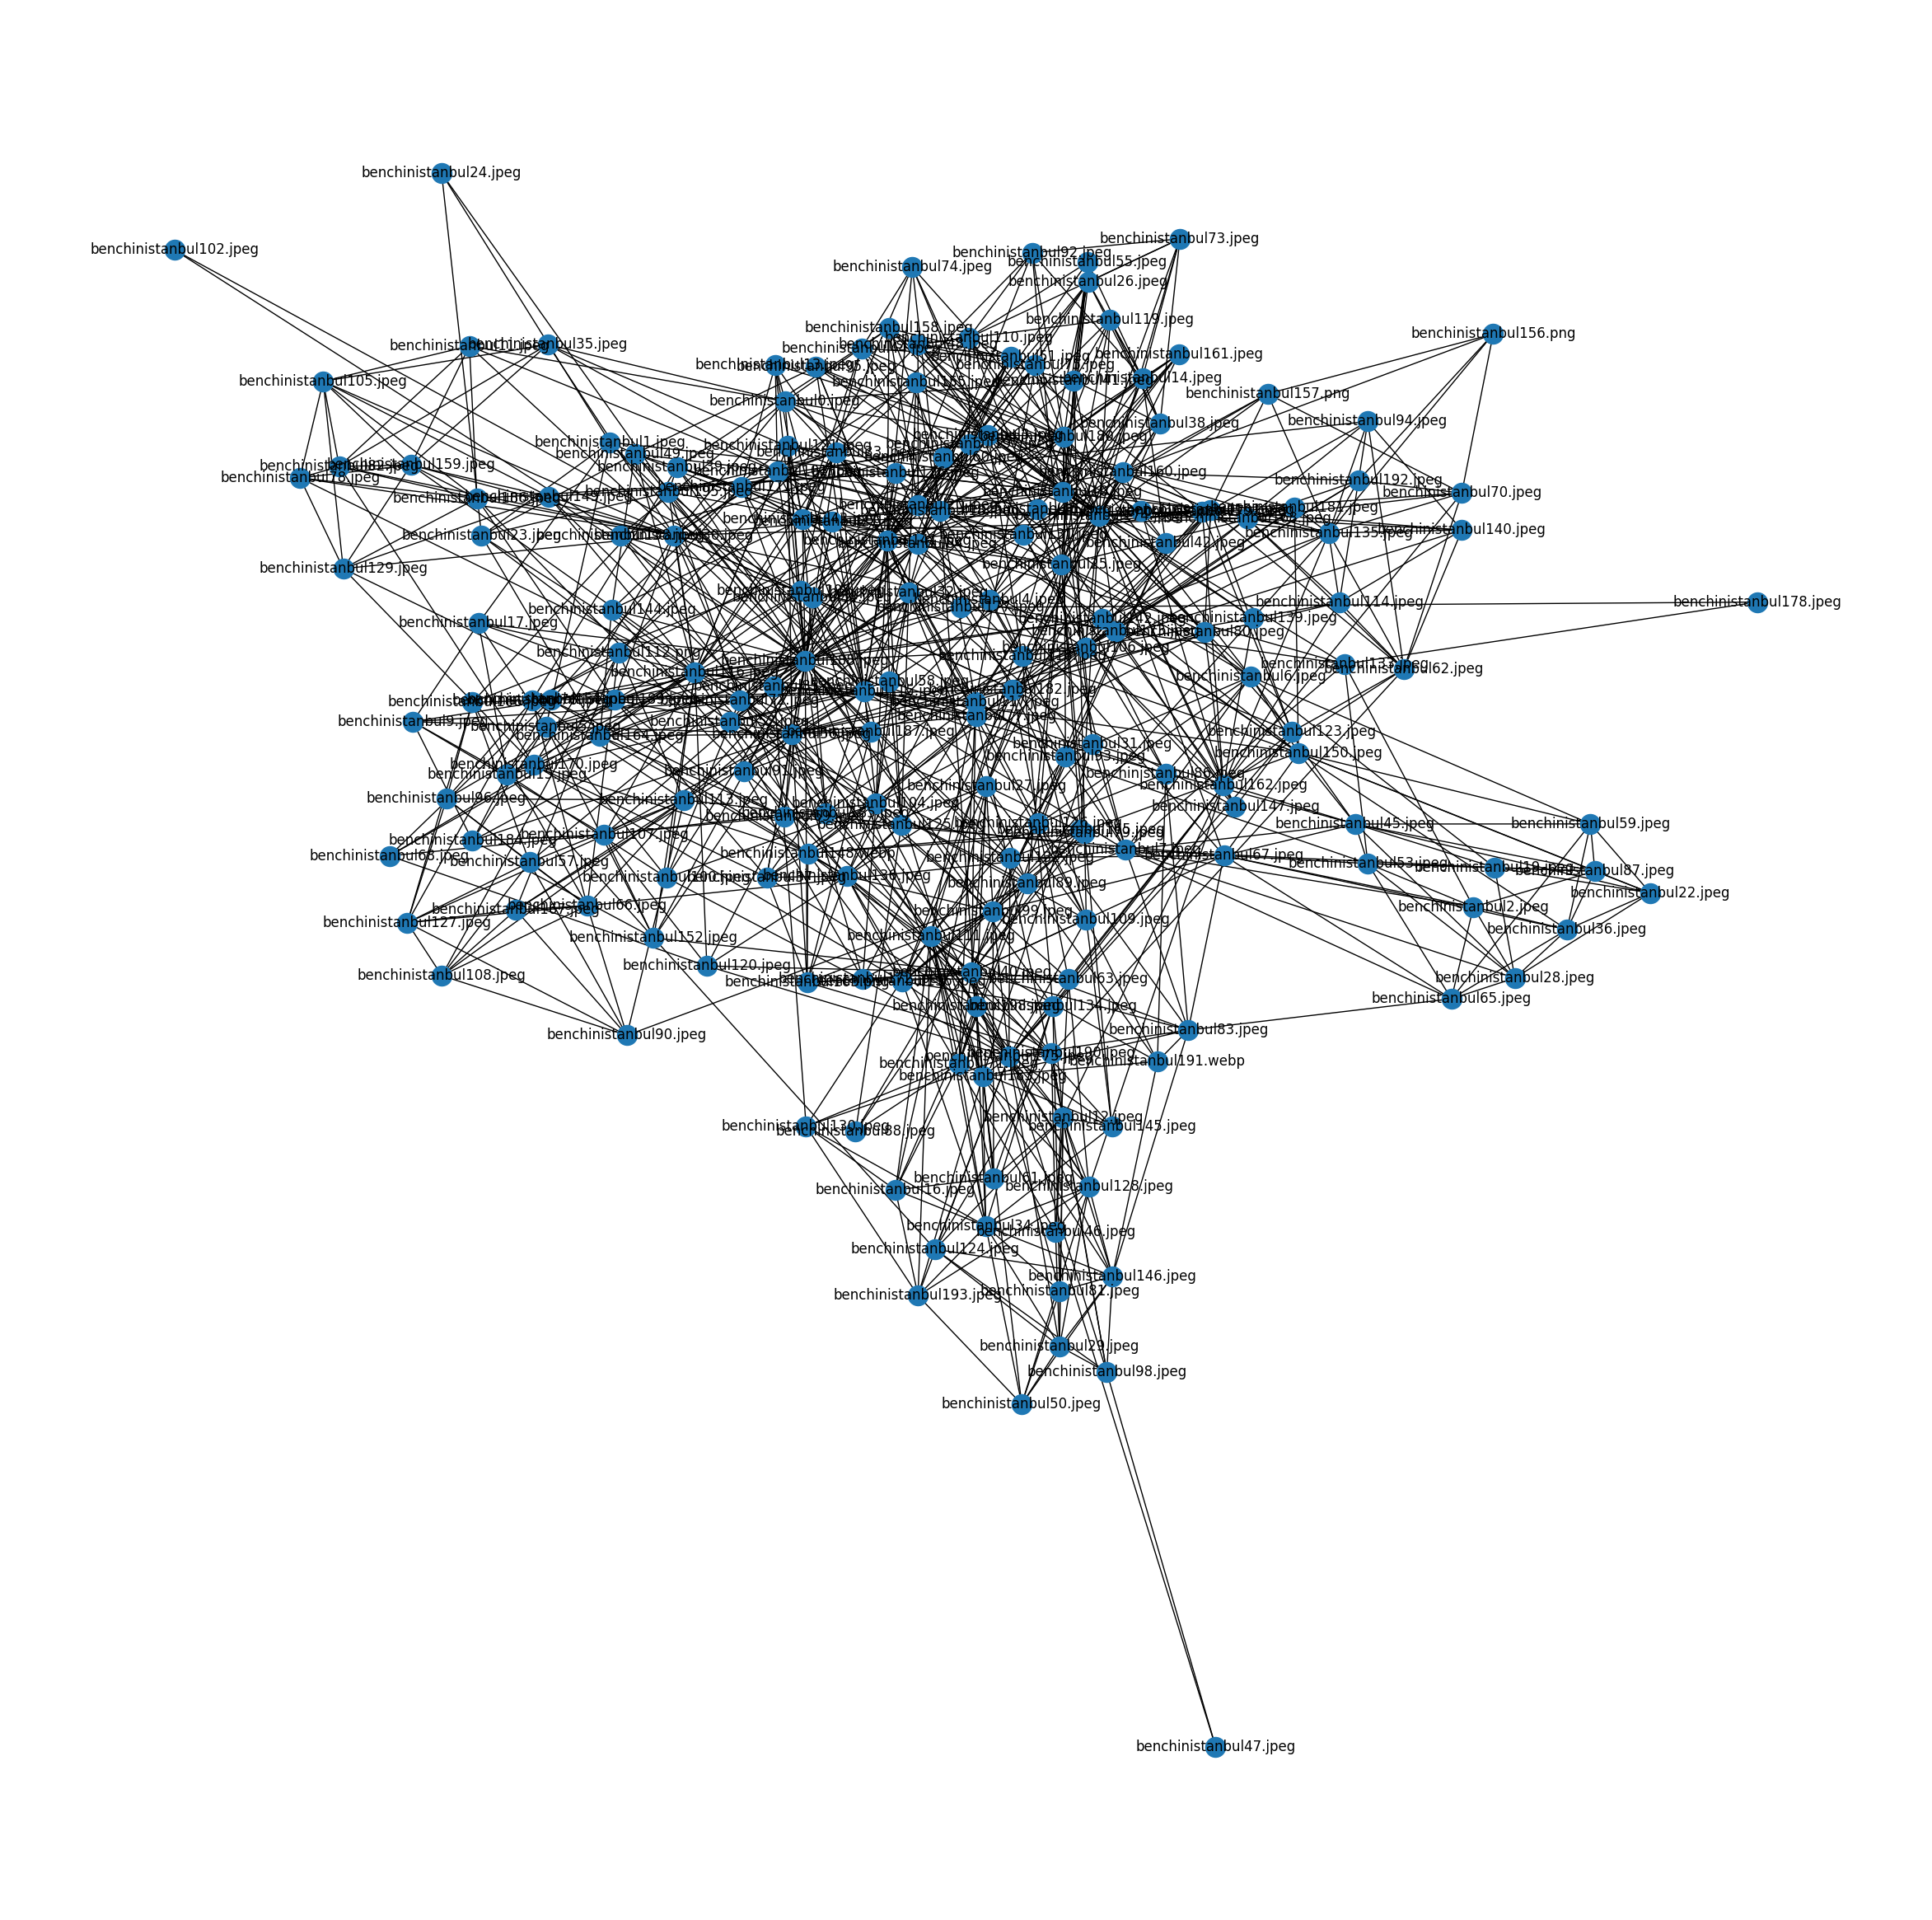

In [31]:
fig, ax = plt.subplots(figsize = (30,30))
nx.draw(G, with_labels=True)

In [34]:
T = nx.minimum_spanning_tree(G)

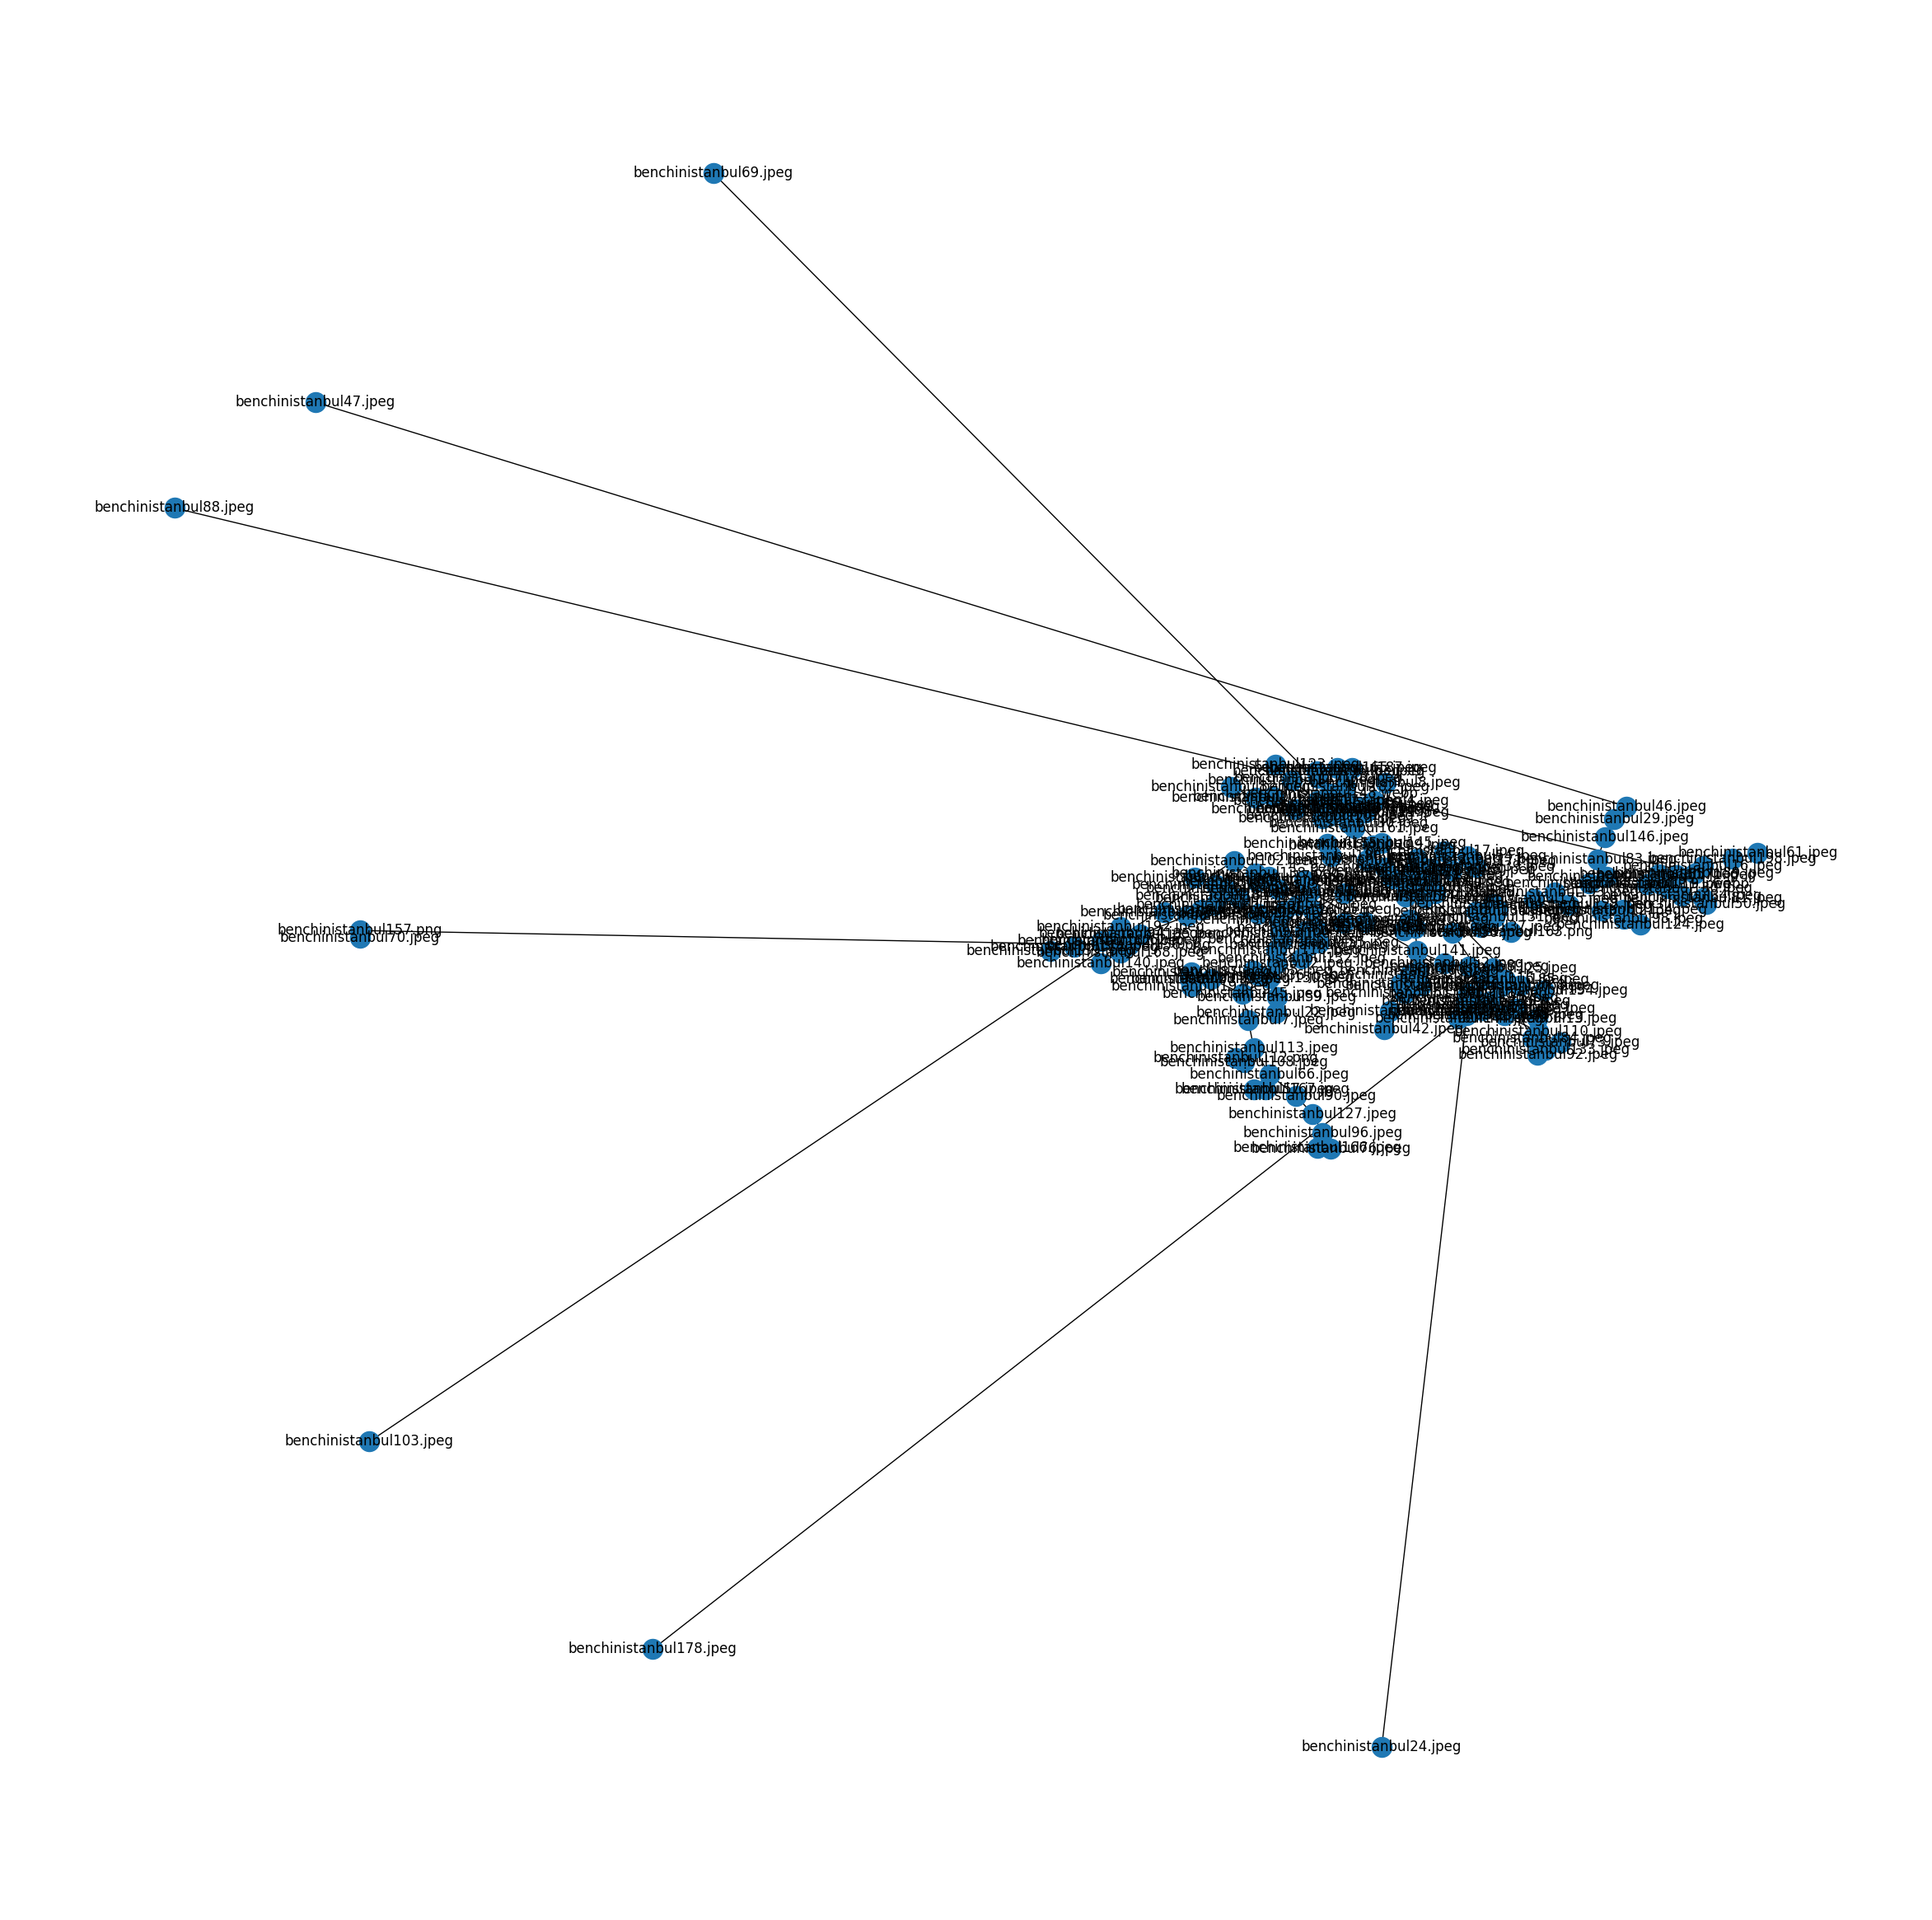

In [35]:
fig, ax = plt.subplots(figsize = (30,30))
nx.draw(T, with_labels=True)